# 使用PCA去噪

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
m = 100
n = 2
X = np.empty((m,n))
X[:,0] = np.random.uniform(1.,100.,size=m)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(1.,10.,size=100)

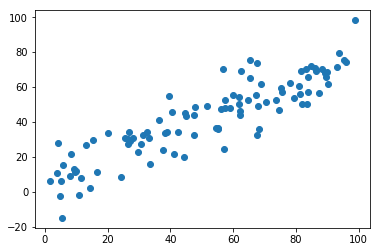

In [5]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [6]:
from sklearn.decomposition import PCA
pca= PCA(n_components=1)
pca.fit(X)
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

In [11]:
X_reduction.shape

(100, 1)

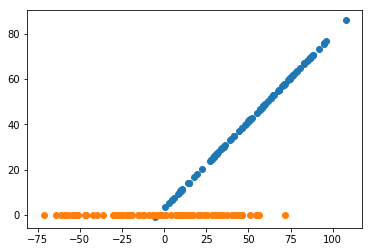

In [13]:
plt.scatter(X_restore[:,0],X_restore[:,1])
plt.scatter(X_reduction[:,0],np.zeros((1,len(X_reduction))))
plt.show()

### 降维的过程可以理解成是去噪。

## 手写识别的例子

In [17]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [18]:
X.shape

(1797, 64)

In [21]:
noisy_digits = X + np.random.normal(0, 4, size=X.shape)

In [22]:
noisy_digits.shape

(1797, 64)

In [25]:
example_digits = X[y==0,:][:10]
for num in range(1,19):
    example_digits = np.vstack([example_digits,noisy_digits[y==num,:][:10]])

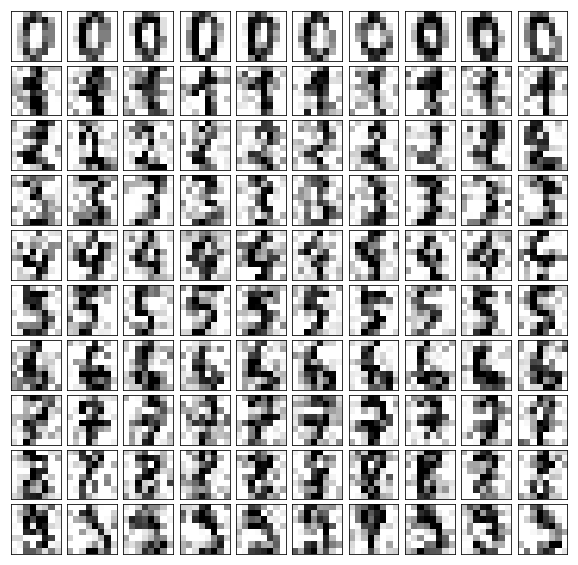

In [26]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

    plt.show()
    
plot_digits(example_digits)

In [29]:
from sklearn.decomposition import PCA
pca = PCA(0.8).fit(X)
pca.n_components_

13

In [31]:
X_reduction = pca.transform(X)

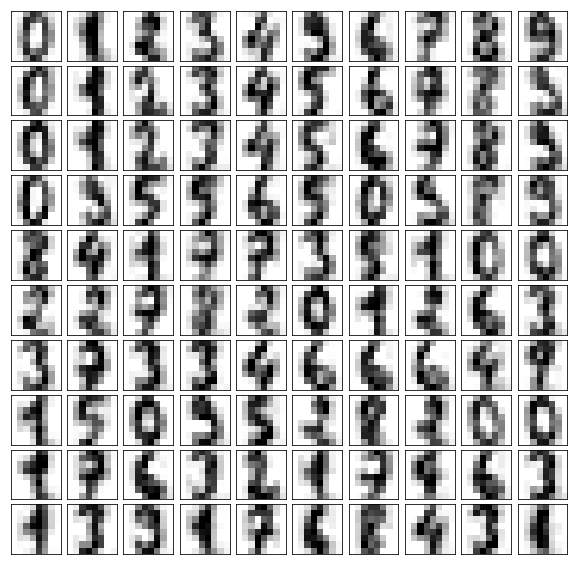

In [32]:
filtered_plot = pca.inverse_transform(X_reduction)
plot_digits(filtered_plot)